In [116]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import import_ipynb
from Student_info import country_Student
from Student_info import student_info
from collections import Counter

In [3]:
student_purchases = pd.read_csv('dataSets/365_database/365_student_purchases.csv')
student_purchases
student_purchases['purchase_type'].unique()

array(['Annual', 'Monthly', 'Quarterly'], dtype=object)

In [4]:
missing_country_df = student_info[student_info.isnull().any(axis=1)]
missing_country = missing_country_df['student_id'].tolist()
missing_country

[261725,
 262665,
 272144,
 278827,
 282654,
 282914,
 283704,
 283791,
 284550,
 284790,
 286959,
 290648,
 293967]

In [5]:
df = student_purchases.copy()

df_cleaned = df[~df['student_id'].isin(missing_country)]
student_purchases_cleaned = df_cleaned.reset_index(drop=True)
(student_purchases_cleaned)

,purchase_id,student_id,purchase_type,date_purchased
0,15781,258800,Annual,2022-01-01
1,15786,258803,Annual,2022-01-01
2,15808,258862,Annual,2022-01-01
3,15809,258865,Annual,2022-01-01
4,15811,258878,Annual,2022-01-01
...,...,...,...,...
3035,23148,278055,Monthly,2022-10-20
3036,23150,270103,Annual,2022-10-20
3037,23151,270824,Monthly,2022-10-20
3038,23152,295497,Monthly,2022-10-20


In [6]:
country = []
i = 0
n = len(student_purchases_cleaned)-1

while (i<=n):
    x=student_purchases_cleaned['student_id'].loc[i]
    y=country_Student[x]
    country.append(y)
    i=i+1

In [7]:
print(len(country))
df_country = pd.DataFrame(country,columns = ['country'])
df_country

3040


,country
0,CA
1,US
2,NL
3,CA
4,CA
...,...
3035,ZW
3036,GB
3037,US
3038,NL


In [8]:
frames = [student_purchases_cleaned, df_country]

student_purchases_by_country = pd.concat(frames,axis = 1)

print(student_purchases_by_country.info())
# print(student_purchases_by_country.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3040 entries, 0 to 3039
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   purchase_id     3040 non-null   int64 
 1   student_id      3040 non-null   int64 
 2   purchase_type   3040 non-null   object
 3   date_purchased  3040 non-null   object
 4   country         3040 non-null   object
dtypes: int64(2), object(3)
memory usage: 118.9+ KB
None


In [131]:
student_purchase_annual =student_purchases_by_country[student_purchases_by_country['purchase_type']=='Annual'].reset_index(drop=True)
student_purchase_quarterly =student_purchases_by_country[student_purchases_by_country['purchase_type']=='Quarterly'].reset_index(drop=True)
student_purchase_monthly =student_purchases_by_country[student_purchases_by_country['purchase_type']=='Monthly'].reset_index(drop=True)
len(student_purchase_annual['date_purchased'].unique())

277

From the above dataframe we can track the number and type of subscriptions purchased across time.

<mark>'date_purchased'</mark> will be extracted from these dataframes, exported as Excel files and then, visualized (line graphs? in Tableau Public.

In [139]:
annual_dates = pd.DataFrame(student_purchase_annual['date_purchased'])
annual_dates.to_excel('annual_dates.xlsx')

quarterly_dates = pd.DataFrame(student_purchase_quarterly['date_purchased'])
quarterly_dates.to_excel('quarterly_dates.xlsx')

monthly_dates = pd.DataFrame(student_purchase_monthly['date_purchased'])
monthly_dates.to_excel('monthly_dates.xlsx')

45


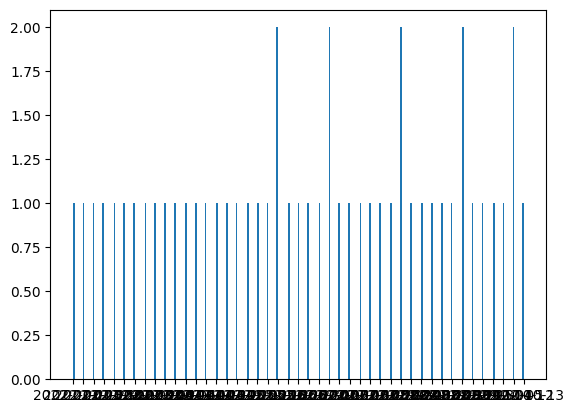

In [40]:
quarterly_date = student_purchase_quarterly['date_purchased']
quarterly_purchase_days = len(student_purchase_quarterly['date_purchased'].unique())
print(quarterly_purchase_days)
plt.hist(quarterly_date, bins = annual_purchase_days)
plt.show()

284


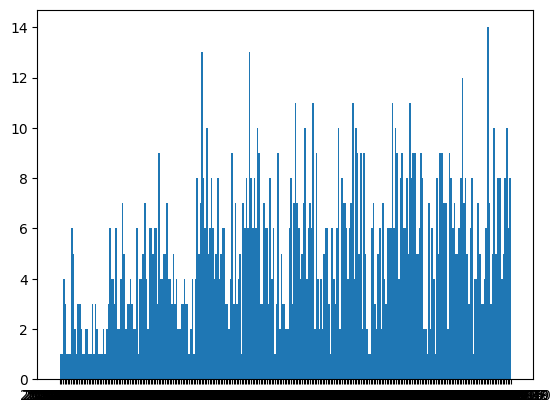

In [39]:
monthly_date = student_purchase_monthly['date_purchased']
monthly_purchase_days = len(student_purchase_monthly['date_purchased'].unique())
print(monthly_purchase_days)
plt.hist(monthly_date, bins = monthly_purchase_days)
plt.show()